In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

metrics = ['loss']
results_path = "/data/vision/polina/users/ramyamut/projects/mri_final_project/models/interleaved_equi_2/metrics.json"

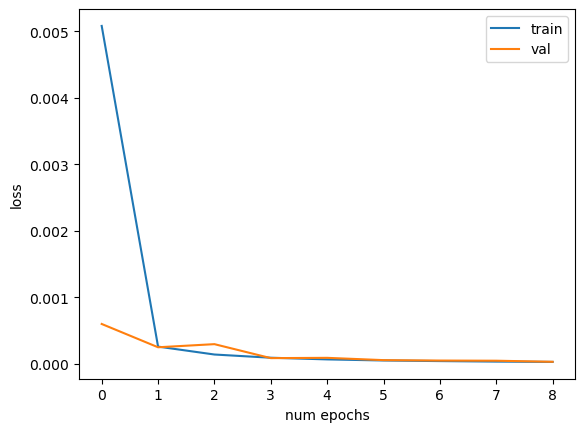

In [2]:
for metric in metrics:
    plt.figure()
    with open(results_path, 'r') as f:
        results = json.load(f)
    epochs = np.arange(len(results[f'train/{metric}']))
    metric_train = results[f'train/{metric}']
    metric_val = results[f'val/{metric}'][1:]
    plt.plot(epochs, metric_train)
    plt.plot(epochs, metric_val)
    plt.xlabel('num epochs')
    plt.ylabel(metric)
    plt.legend(['train', 'val'])
    plt.show()

/tmp/ipykernel_386968/3478718455.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  kspace = imageio.imread(path_kspace) / 255
/tmp/ipykernel_386968/3478718455.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path_img) / 255
/tmp/ipykernel_386968/3478718455.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  recon = imageio.imread(path_recon) / 255
/tmp/ipy

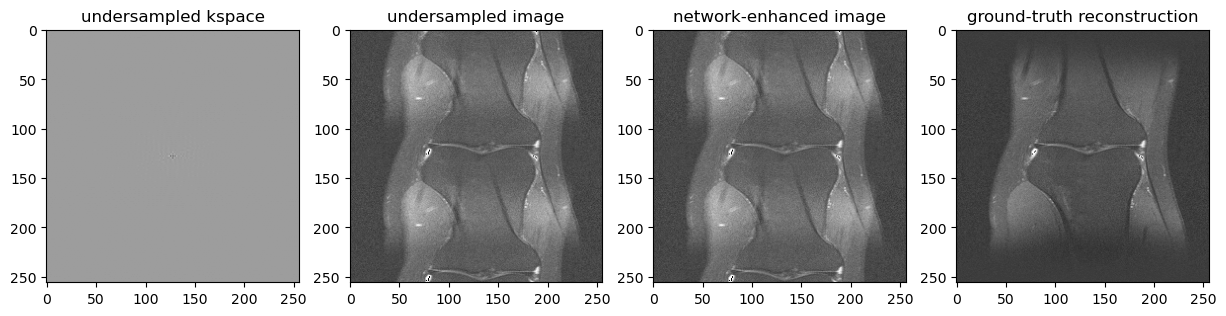

In [14]:
import imageio
import glob
import os

idx = 10
path_kspace = sorted(glob.glob("/data/vision/polina/users/ramyamut/projects/mri_final_project/models/interleaved_equi_2/results/kspace/*.png"))[idx]
kspace = imageio.imread(path_kspace) / 255
path_img = path_kspace.replace("/kspace/", "/img/")
img = imageio.imread(path_img) / 255
path_recon = path_kspace.replace("/kspace/", "/recon/")
recon = imageio.imread(path_recon) / 255
path_pred = path_kspace.replace("/kspace/", "/pred/")
pred = imageio.imread(path_pred) / 255

plt.figure(figsize=(15,15))
ax = plt.subplot(1, 4, 1)
ax.imshow(kspace, cmap='gray')
ax.set_title("undersampled kspace")

ax = plt.subplot(1, 4, 2)
ax.imshow(img, cmap='gray')
ax.set_title("undersampled image")

ax = plt.subplot(1, 4, 3)
ax.imshow(pred, cmap='gray')
ax.set_title("network-enhanced image")

ax = plt.subplot(1, 4, 4)
ax.imshow(recon, cmap='gray')
ax.set_title("ground-truth reconstruction")
plt.show()

In [13]:
kspace.shape

(256, 256)